<a href="https://colab.research.google.com/github/manisudhan/apllestockprediction/blob/main/aaple_stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
!pip install yfinance
import yfinance as yf

import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [ ]:
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Display the first 5 rows
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.359183,12.397353,12.292163,12.304185,302220800
2012-01-04,12.425604,12.462872,12.300579,12.322217,260022000
2012-01-05,12.563550,12.579178,12.402459,12.470983,271269600
2012-01-06,12.694887,12.705406,12.599315,12.615845,318292800
2012-01-09,12.674750,12.855677,12.663329,12.788055,394024400
...,...,...,...,...,...
2019-12-10,64.915070,65.299511,64.281581,64.944083,90420400
2019-12-11,65.468758,65.548552,64.919903,64.994856,78756800


In [ ]:


df.shape

(2002, 5)

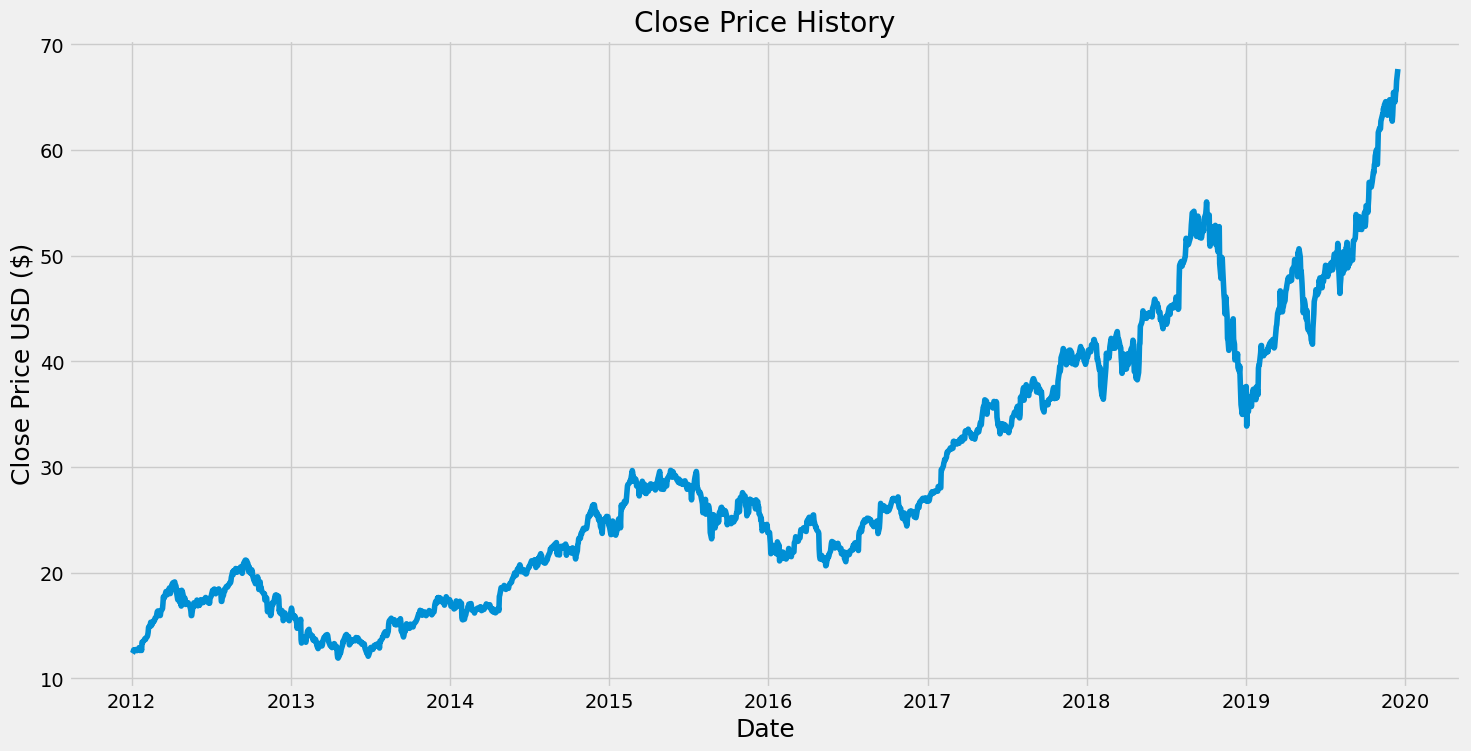

In [ ]:
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
print(df.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [ ]:

#create new data frame with only "close column"
data = df[['Close']]
print(df[['Close']])
#convert dataframe to numpy array
dataset = data.values

#get number of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

Price           Close
Ticker           AAPL
Date                 
2012-01-03  12.359183
2012-01-04  12.425604
2012-01-05  12.563550
2012-01-06  12.694887
2012-01-09  12.674750
...               ...
2019-12-10  64.915070
2019-12-11  65.468758
2019-12-12  65.635612
2019-12-13  66.527794
2019-12-16  67.666634

[2002 rows x 1 columns]


1602

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape
print(scaled_data)

[[0.00805071]
 [0.00924198]
 [0.01171607]
 ...
 [0.96357326]
 [0.9795747 ]
 [1.        ]]


In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, : ]
#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00805071, 0.00924198, 0.01171607, 0.01407162, 0.01371047,
       0.01452441, 0.01415249, 0.01352718, 0.01267559, 0.01531141,
       0.01768854, 0.01695553, 0.01293959, 0.01677218, 0.01299896,
       0.02714846, 0.02605425, 0.02748263, 0.03057124, 0.03244167,
       0.03228542, 0.03170863, 0.03416657, 0.03647909, 0.03909874,
       0.04333003, 0.05221871, 0.05235339, 0.05730166, 0.06099927,
       0.05464421, 0.05709134, 0.05704292, 0.06390473, 0.06292903,
       0.06473475, 0.06797972, 0.06978552, 0.0749872 , 0.0787765 ,
       0.07987073, 0.08025339, 0.07377444, 0.07221119, 0.07244294,
       0.07853382, 0.08024805, 0.08392962, 0.09260794, 0.10418624,
       0.10201925, 0.10202473, 0.11039589, 0.11301559, 0.11115053,
       0.10944722, 0.10767377, 0.11356525, 0.11760803, 0.11930051])]
[np.float64(0.11511771161657963)]



In [ ]:
print(len(x_train),len(y_train))

1542 1542


In [ ]:
#convert into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape



(1542, 60)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [ ]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)


1542/1542 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - loss: 0.0019


In [ ]:
#create the testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]
#create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
#get the root mean square error
rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse

np.float64(1.969115400314331)

<ipython-input-54-3b83fc262e27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


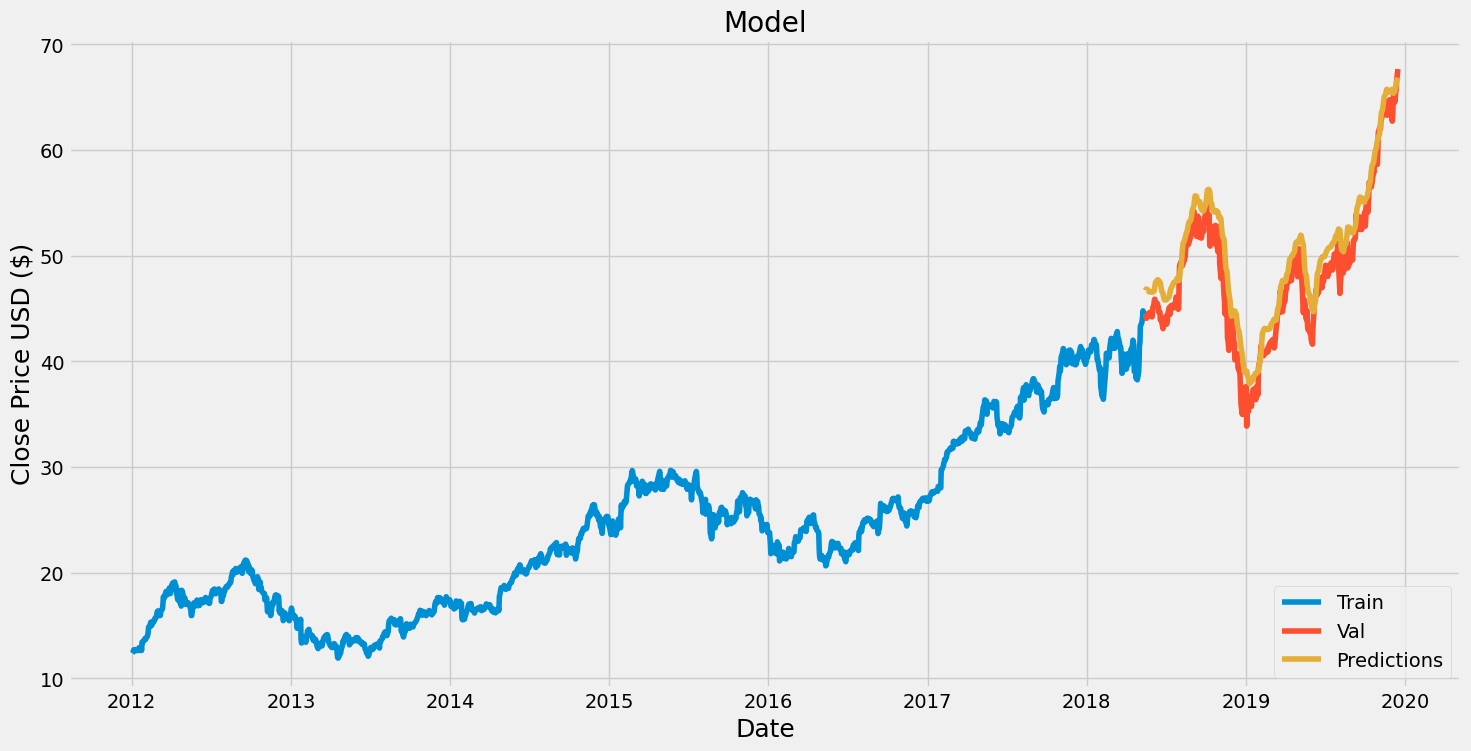

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
last60_days  = scaled_data[-60:]

In [ ]:
future_prediction = []
input_data = np.array(last60_days[:60])  # Make sure this is a NumPy array

for i in range(1250):  # Predict ~5 years (250 trading days/year * 5)
    input_seq = input_data.reshape((1, 60, 1))  # Reshape for LSTM input
    next_prediction = model.predict(input_seq, verbose=0)[0][0]  # Get predicted value
    future_prediction.append(next_prediction)  # Store the prediction

    # Update input_data by removing the oldest and appending the new prediction
    input_data = np.append(input_data[1:], next_prediction)




Exception ignored in: <function _xla_gc_callback at 0x7f34992c8d60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


KeyboardInterrupt: 